In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown --id 1Uxw4QnrMI2vDRpbXQ-W6I-JtToKdqJkQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uxw4QnrMI2vDRpbXQ-W6I-JtToKdqJkQ
To: /content/train.jsonl
100% 19.1M/19.1M [00:00<00:00, 53.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers.legacy import Adam
from xgboost import XGBClassifier
from wordcloud import WordCloud

import re

%matplotlib inline

In [ ]:
!pip install emoji
nltk.download('stopwords')
nltk.download('punkt')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=9f59c703e1f4befeebe9389331658a1e9e5819f5e1cfb00180424e4a4da68770
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove

--2023-05-12 10:50:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-12 10:50:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-12 10:50:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
df = pd.read_json('train.jsonl',lines=True)

#EDA

In [ ]:
df2 = df.copy()

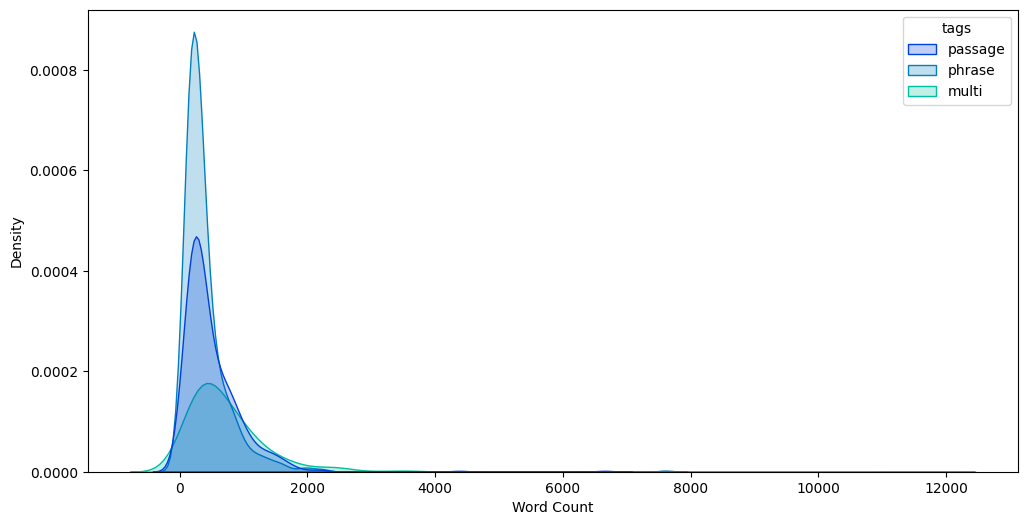

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x =df2[df2['postPlatform']=="Twitter"]['targetParagraphs'].apply(lambda x: " ".join(x)).apply(lambda x:len(x.split())),hue=df2['tags'].apply(lambda x: " ".join(x)), palette= 'winter', fill = True)
plt.xlabel('Word Count')
plt.show()

In [ ]:
df2['postPlatform']=df2['postPlatform'].apply(lambda x: "".join(x))
df2['tags']=df2['tags'].apply(lambda x: "".join(x))


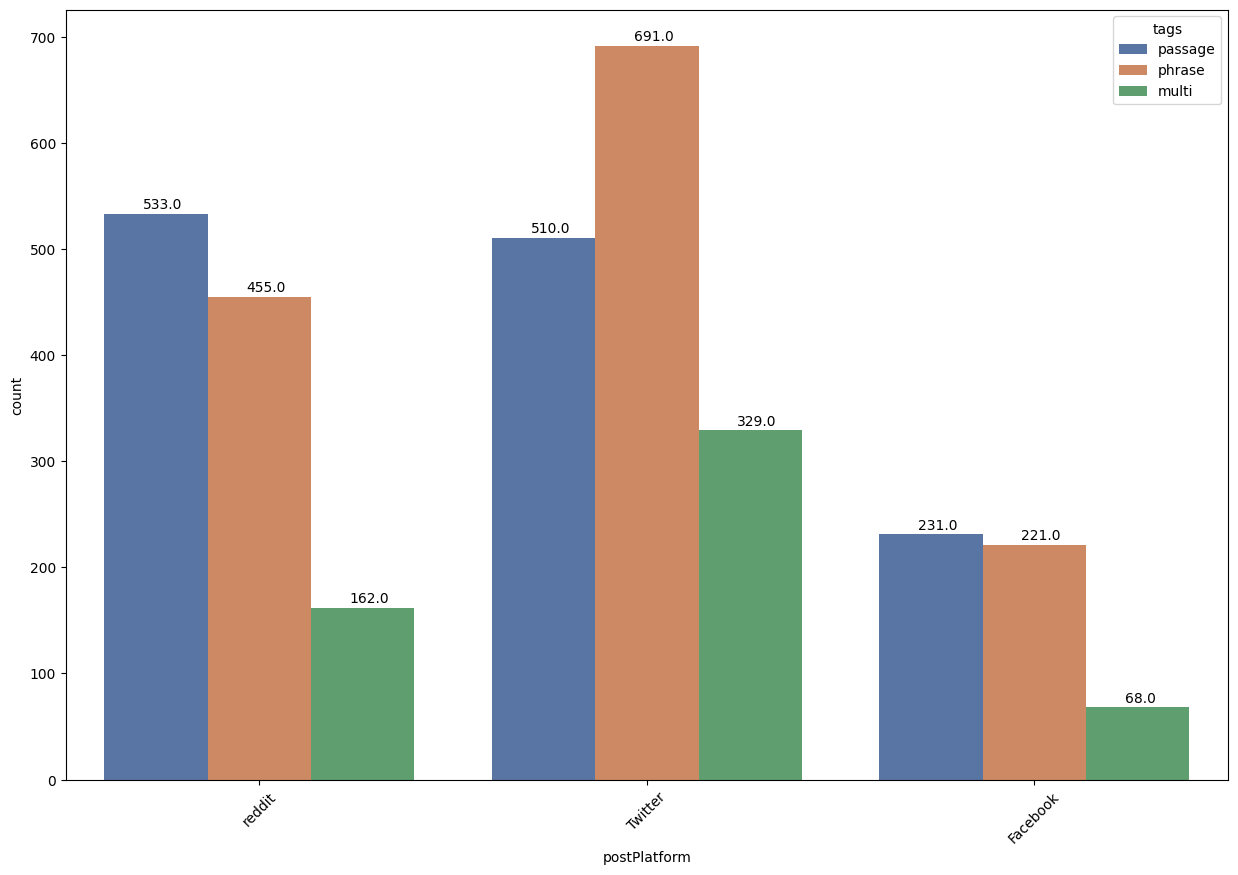

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='postPlatform', hue='tags', data=df2, palette='deep')
plt.xticks(rotation=45)

# add count labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+5))

plt.show()

In [ ]:
def wordcloud_text(text):
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
twitter_text = " ".join(df2[df2['postPlatform'] == 'Twitter']['targetParagraphs'].apply(lambda x: " ".join(x)))
fb_text = " ".join(df2[df2['postPlatform'] == 'Facebook']['targetParagraphs'].apply(lambda x: " ".join(x)))
reddit_text = " ".join(df2[df2['postPlatform'] == 'reddit']['targetParagraphs'].apply(lambda x: " ".join(x)))

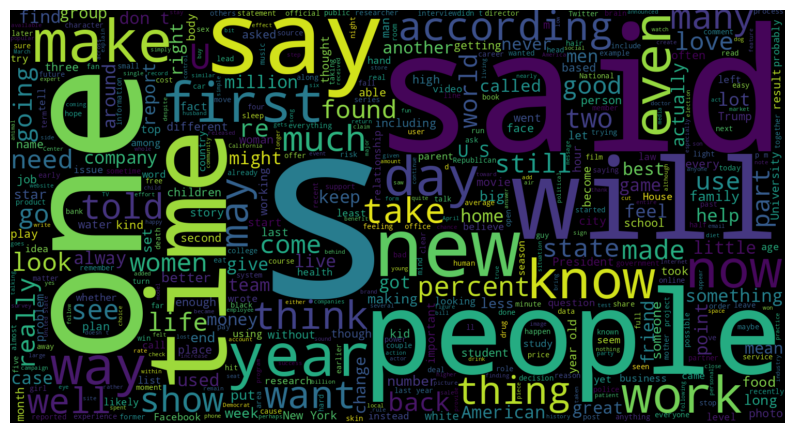

In [ ]:
wordcloud_text(twitter_text)

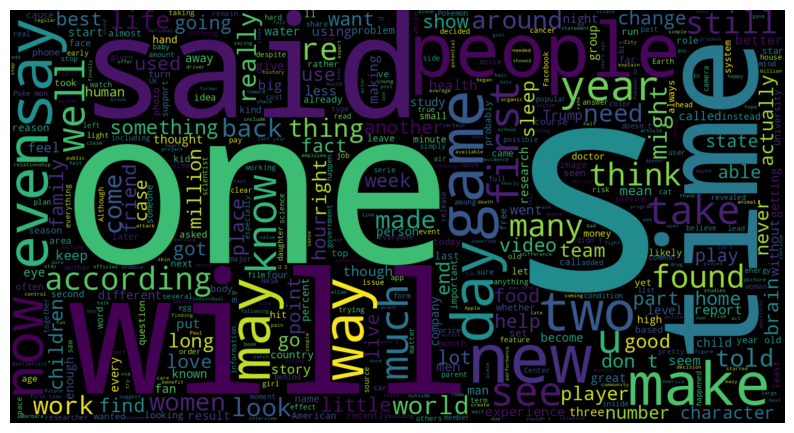

In [ ]:
wordcloud_text(fb_text)

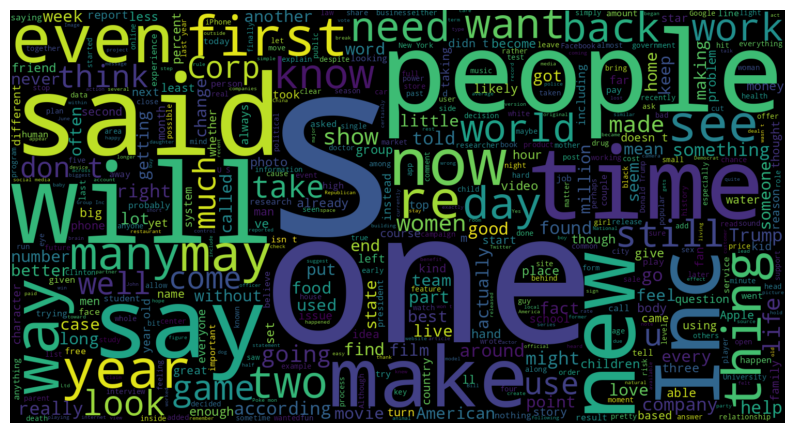

In [ ]:
wordcloud_text(reddit_text)

#Data Preprocessing



#**WORK FLOW**


1.   **USING BASIC ML ALGOS**

  *   USING TF-IDF
  *   STATASTICAL ANALYSIS ON DATA
  *   APPLYING 2/3 BEST ALGO
  *   FINDING THE BEST ONE
  *   IMPROVING PERFORMANCE BY CHANGING HYPER PARAMETERS






2.   **USING NN TO PREDICT**

  *   GloVe Vectorization
  *   Word Embedding
  *   Creating a NN architecture based on our data
  *   Using optimization on NN model to improve performace

3. **Measuring Performance Between ML models and NN**
  * Creating a statastical Analysis how much performance improved
  * Finally creating the optput based on the requirements .





##Data Preprocessing and Feature Engineering on Dataset
1. Dropping Unnecessery columns
  *  uuid, postId, targetMedia, targetUrl, provenance, spoilerPositions.
2. Dropping Duplicate values
3. Measuring Percentage of Missing values in every column and Deciding wether to drop or feature enginner to fill them up
4. Cleaning the textual data

##Data Preprocessing

In [ ]:
def strip_all_entities(text):  #######-------------------------

    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(@|https?\:\/\/)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    #text = re.sub(r'https?://\S+|www\.\S+',text) # URL shoray dibe
    #text = re.sub(r'<.*?>',text) # HTML tags shoray dibe
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def remove_hashtags(text): ###-----------------------------------
    hashtag_regex = r'\#\w+'
    return re.sub(hashtag_regex, '', text)

def remove_url_and_html(text):

    url_regex = r'http\S+|www\S+'
    html_regex = r'<.*?>'
    text_without_url = re.sub(url_regex, '', text)
    text_without_html = re.sub(html_regex, '', text_without_url)
    return text_without_html


def filter_chars(a):       ####-----------------------------------
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):    ###------------------------------
    return re.sub("\s\s+" , " ", text)

def remove_stopwords(text):     ####-------------------------------
    new_list = []
    words = text.split()
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

#lemmatization
def perform_lemmatization(text):  ###------------------------------
    wnl = WordNetLemmatizer()
    new_list = []
    words = text.split()
    for word in words:
        new_list.append(wnl.lemmatize(word))

    return " ".join(new_list)

In [ ]:
df=df.drop(['uuid','postId','targetMedia','targetUrl','provenance','spoilerPositions','spoiler'],axis=1)

In [ ]:
df.head(2)

,postText,targetParagraphs,targetTitle,targetDescription,Facebook,Twitter,reddit,multi,passage,phrase,combined_text
0,wes welker wanted dinner tom brady patriot qb ...,itll like old time weekend tom brady wes welke...,wes welker wanted dinner tom brady patriot qb ...,itll like old time weekend tom brady wes welke...,0,0,1,0,1,0,wes welker wanted dinner tom brady patriot qb ...
1,nasa set date full recovery ozone hole,2070 shaping great year mother earth thats nas...,hole ozone layer expected make full recovery 2...,2070 shaping great year mother earth thats nas...,0,1,0,0,0,1,nasa set date full recovery ozone hole 2070 sh...


In [ ]:
df['postText'] = df['postText'].apply(lambda x : ' '.join(x))

In [ ]:
df['targetParagraphs'] = df['targetParagraphs'].apply(lambda x : ' '.join(x))

In [ ]:
df['tags'] = df['tags'].apply(lambda x : ' '.join(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postText           3200 non-null   object
 1   postPlatform       3200 non-null   object
 2   targetParagraphs   3200 non-null   object
 3   targetTitle        3200 non-null   object
 4   targetDescription  2933 non-null   object
 5   targetKeywords     2116 non-null   object
 6   tags               3200 non-null   object
dtypes: object(7)
memory usage: 175.1+ KB


In [ ]:
df.drop(['targetKeywords'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postText           2933 non-null   object
 1   postPlatform       2933 non-null   object
 2   targetParagraphs   2933 non-null   object
 3   targetTitle        2933 non-null   object
 4   targetDescription  2933 non-null   object
 5   tags               2933 non-null   object
dtypes: object(6)
memory usage: 160.4+ KB


In [ ]:
df['targetParagraphs'].duplicated().sum()

15

In [ ]:
df.drop_duplicates(subset=['targetParagraphs'],inplace=True)

In [ ]:
df.drop_duplicates(subset=['postText'],inplace=True)

In [ ]:
df.drop_duplicates(subset=['targetTitle'],inplace=True)

In [ ]:
df.describe()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,tags
count,2899,2899,2899,2899,2899,2899
unique,2899,3,2899,2899,2807,3
top,"Wes Welker Wanted Dinner With Tom Brady, But P...",Twitter,It’ll be just like old times this weekend for ...,"Wes Welker Wanted Dinner With Tom Brady, But P...",,phrase
freq,1,1496,1,1,65,1242


In [ ]:
df.drop_duplicates(subset=['targetDescription'],inplace=True)

In [ ]:
dummy = pd.get_dummies(df['postPlatform'])
df = pd.concat([df,dummy],axis=1)
df.drop(['postPlatform'],axis=1,inplace=True)

dummy = pd.get_dummies(df['tags'])
df = pd.concat([df,dummy],axis=1)
df.drop(['tags'],axis=1,inplace=True)

In [ ]:
df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription']]=df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription']].applymap(lambda x: perform_lemmatization(remove_stopwords(remove_mult_spaces(filter_chars(remove_hashtags(remove_url_and_html(strip_all_entities(x))))))))

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_on_paragraph = vectorizer.fit(df['targetParagraphs'])

In [ ]:
transformer = ColumnTransformer([
    ('tfidf_post_text',tfidf_on_paragraph , 0),
    ('tfidf_target_paragraph',tfidf_on_paragraph,1),
    ('targetTitle',tfidf_on_paragraph,2),
    ('targetDescription',tfidf_on_paragraph,3),
],remainder='passthrough')

In [ ]:
df.columns

Index(['postText', 'targetParagraphs', 'targetTitle', 'targetDescription',
       'Facebook', 'Twitter', 'reddit', 'multi', 'passage', 'phrase'],
      dtype='object')

In [ ]:
X = df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription', 'Facebook', 'Twitter', 'reddit']]

In [ ]:
X = transformer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df[['multi', 'passage', 'phrase']], test_size=0.2, random_state=23)

In [ ]:
xgb_model = XGBClassifier()

# fit the model on training data
xgb_model.fit(X_train, y_train)

# predict on test data
xgb_pred = xgb_model.predict(X_test)

# evaluate the model performance
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred,average='micro')

print("Accuracy:", xgb_accuracy)
print("f1:", xgb_f1)

Accuracy: 0.2918149466192171
f1: 0.4041666666666667


In [ ]:
y_train = np.argmax(y_train.values, axis=1)
y_test = np.argmax(y_test.values, axis=1)

In [ ]:
from sklearn.svm import LinearSVC

# Create the SVM classifier
svm = LinearSVC()

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = svm.predict(X_test)

In [ ]:
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred,average='micro')


print("Accuracy:", svc_accuracy)
print("f1:", svc_f1)


Accuracy: 0.50355871886121
f1: 0.50355871886121


#RNN

#RNN

In [ ]:
def tokenize(text):
    """
    Tokenizes a piece of text using the nltk library's word_tokenize method.
    """
    return nltk.word_tokenize(text)

In [ ]:
df['combined_text'] = df['postText'] + ' ' + df['targetParagraphs'] + ' ' + df['targetTitle'] + ' ' + df['targetDescription']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_text'])
sequences = tokenizer.texts_to_sequences(df['combined_text'])
maxlen = max(len(seq) for seq in sequences)
#print(maxlen)
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

embedding_path = '/content/glove/glove.6B.100d.txt'

embeddings_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=np.max(padded_sequences) + 1, output_dim=100, input_length=padded_sequences.shape[1]))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='relu'))
num_samples = len(padded_sequences)
df_subset = df[['multi', 'passage', 'phrase']][:num_samples]
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_subset, test_size=0.2, random_state=42)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test),validation_split=0.1)

141/141 [==============================] - 89s 620ms/step - loss: 0.7022 - accuracy: 0.6658 - val_loss: 0.6385 - val_accuracy: 0.6667


In [ ]:
model_pred = model.predict(X_test)

18/18 [==============================] - 3s 136ms/step


In [ ]:
model_pred_binary = (model_pred > 0.5).astype(int)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100))

18/18 [==============================] - 3s 138ms/step - loss: 0.6385 - accuracy: 0.6667
Accuracy: 66.67%


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)
print(classification_report(y_true, y_pred_classes))
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred_classes)
print("F1-score for each class:", f1_score)

18/18 [==============================] - 3s 133ms/step
              precision    recall  f1-score   support

           0       0.16      1.00      0.28        92
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       236

    accuracy                           0.16       562
   macro avg       0.05      0.33      0.09       562
weighted avg       0.03      0.16      0.05       562

F1-score for each class: [0.28134557 0.         0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

#Accuracy Comparision

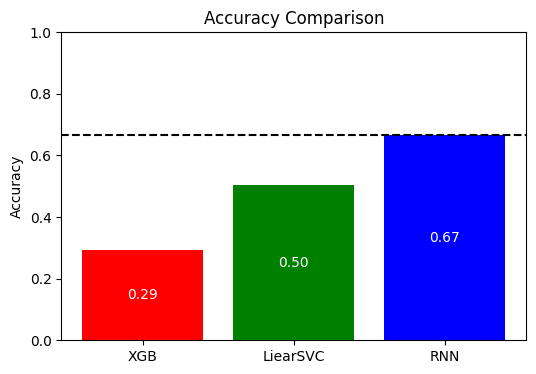

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
rects =ax.bar(['XGB',"LiearSVC", "RNN"], [xgb_accuracy, svc_accuracy, accuracy], color=['r', 'g', 'b'])
max_acc = max(xgb_accuracy, svc_accuracy, accuracy)
ax.axhline(y=max_acc, color='k', linestyle='--')
for rect in rects:
    width = rect.get_width()
    height = rect.get_height()
    x = rect.get_x() + width / 2
    y = height / 2
    ax.text(x, y, f'{height:.2f}', ha='center', va='center', color='white')
ax.set_title('Accuracy Comparison')
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
plt.show()